# **About this notebook**. 

# In this notebook  you can find what is sales forecasting and its main concepts and assumptions, all the steps respecting to  data cleaning, feature engineering, feature selection, data preparation and the models used in forecasting. 

## This is an educational project on time series based on the ideas and implementation from the blogs listed bellow. 

# **These are the articles and blogs that this notebook is based on. All the credits belongs to the respective authors**. 

### [Time Series Forecasting with the Long Short-Term Memory Network in Python](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/)

### [Predicting sales time series analysis forecasting with python](https://medium.com/analytics-vidhya/predicting-sales-time-series-analysis-forecasting-with-python-b81d3e8ff03f) and its [github code](https://github.com/bisman16/Kaggle_Rossmann_Store_Sales_Forecasting/blob/master/Rossmann_Store_Analysis.ipynb)

### [The complete guide to time series analysis and forecasting.](https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775)


### [Open Machine Learning Course. Topic 9. Part 1. Time series analysis in Python.](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3) 


### [A dive deep on arima models.](https://towardsdatascience.com/a-deep-dive-on-arima-models-8900c199ccf)

### [Facebook prophet.](https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/)

### [How to Remove Trends and Seasonality with a Difference Transform in Python](https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/)



# **Main concepts about time series and forecasting.**

## **Time series**.

### Time series are a series of data points ordered in time. Time is often the independent variable and the goal is usually to make a forecast for the future. They are equaly spaced and can be represented in a daily, weekly or yearly basis. 

### We can use time series analysis to quantify the rate at which the values are trending upward or downward, measure how much one value is correlated with the previous few, decompose our data into its underlying repeating cycles, and more.

### In finance it is used to the determine the stability of ninancial markets and the efficiency of portolios. 

### To summarize a time series and predict its future, **we need to model the relationship the values in the time series have with one another**.Does today tend to be similar to yesterday, a week ago, or last year? How much do factors outside the time series, such as noise or other time series, play a role?

## **Notation used in time series**

### Time series variables are described by capital letters like _X_ or _Y_.

### The entire period is denoted by T.

### A single period is denoted by t refering to an interval. 

#### Example:

#### X : Daily closing prices for 2008. 

#### T : entire year. 

#### t : a single day of 2008.  

#### $X_{t}$ : is the closing price at day t. 


## **Peculiarities of time series data**. 

### The intervals between different observations must be identical. 

### We sometimes need to adjust the frequency of the data based on the analysis we are conducting. This can be a daily, weekly, monthly, yearly among others. 


### If we need to increase the frequency of the data it would result on missing values for the new single periods. Those missing values must be imputed with some type of agreggation like mean, median, mode or others. 


### As the time series data are chronological, we cannot shuffle and then split the data to obtain the train and test datasets. Here, we need to split the data at some point of the time period of the dataset. The period before that point would be the train dataset and the period after that point would be the test dataset. 


### Time series data do not follow any type of distribution because these type of data never satisfies Gauss -markov assumptions. 

### Time series data assumes that past patterns in  the variable will continue unchanged in the future. 


## **Autocorrelation**. 


###  Autocorrelation means “self-correlation”: it is the similarity of a time series’ values with earlier values, or lags. If our time series was the values [5, 10, 15], for example, our lag-1 autocorrelation would be the correlation of [10, 15] with [5, 10].

### We can visualize the correlation of the present value with a previous value n lags ago with an autocorrelation plot.

### These plots are constructed by calculating the correlation of each value ($y_{t}$) with the value at the previous time step $(y_{t-1})$, two steps ago $(y_{t-2})$, three $(y_{t-3})$, and so on. The y-axis shows the strength of correlation at lag n, and we consider any value outside the shaded error interval to be a significant correlation.

### The correlation at lag zero is always 1: $y_{t}$ better be perfectly correlated with $y_{t}$, or something’s wrong. For the remaining lags, there are three typical patterns: 1) a lack of autocorrelation, 2) a gradual decay, and 3) a sharp drop. (Though in real-world data, you might get a mix of #2 and #3.)

<img src= https://miro.medium.com/max/700/1*z6qo6lQNLr6N6PPRYNYwOA.png width="600">

### Below we visualize the autocorrelation of daily S&P 500 closing prices (left) and daily maximum temperature at the Chicago Botanical Garden (right). The S&P 500 prices are so correlated that you have to look more than three months into the past to find uncorrelated values. The Chicago temperatures become uncorrelated faster, at about the two month mark, but then shoot out the other side and become negatively correlated with temperatures from 4–7 months ago.

<img src= https://miro.medium.com/max/700/1*CDOto_vxYogafTntbeW3gw.png width="600">

## **Partial autocorrelation**

### Partial autocorrelation is the correlation of $y_{t}$ and $y_{t-n}$, controlling for the autocorrelation at earlier lags.

### Let’s say we want to measure the lag-2 autocorrelation without the lag-1 spillover. Rather than directly measure the correlation of $y_{t}$ and $y_{t-2}$, we’d fit a linear regression of  $y_{t} \sim \beta _{0} + \beta _{1}y_{t-1}$, a regression of $y_{t-2} \sim  \beta_{0}+ \beta_{1}y_{t-1}$, and then find the correlation between the residuals of these two regressions.

### The residuals quantify the amount of variation in $y_{t} and y_{t-2}$ that cannot be explained by $y_{t-1}$, granting us an **unbiased look at the relationship between $y_{t} and y_{t-2}$**.

### Here’s how the partial autocorrelation plots look for the S&P 500 prices and Chicago temperatures. Notice how the lag-1 autocorrelation remains highly significant, but the following lags dive off a cliff.

<img src= https://miro.medium.com/max/700/1*pSj24C--Tot_914-hBTjDQ.png width="600">

### These plots (autocorrelation and partial autocorrelation), then, are probably more useful as complementary ways of visualizing the temporal dependence of your data.


## **Stationarity**.

<img src= https://miro.medium.com/max/700/1*bVENx6-rF1kSY8pWN3HuMw.png width="600">

### Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant **mean and variance, and covariance is independent of time**. 

### This doesn’t mean we can only forecast time series that look like the green jumbled mess above. While most real-world time series aren’t stationary, we can transform a time series into one that is stationary, generate forecasts on the stationary data, then un-transform the forecast to get the real-world values.

### Some common transformations include [differencing](https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/) (and then possibly differencing again), taking the logarithm or square root of the data, or taking the percent change.

### Transformations are necessary because linear models require that the data they model be independent and identically likely to be drawn from the parent population. This isn’t the case with time series data − any autocorrelation at all immediately violates the independence assumption. But many of the conveniences of independent random variables − such as the law of large numbers and the central limit theorem − also hold for stationary time series. Making a time series stationary is therefore a critical step in being able to model our data.

## There is another method for measuring the stationarity of the data is the ADF test. This is a hypotesis test where the null hypotesis states that the data is **no stationary** and the alternative hypotesis states that the data **is stationary**.

## The (Augmented Dicky fuller test) ADF in essence measures reversion to the mean − a non-stationary process has no problem drifting away, and previous lags don’t provide relevant information. The lagged values of a stationary process, meanwhile, do provide relevant info in predicting the next values.


## **Seasonality**.

### As alluded to in the name, seasonality refers to repeating patterns with a fixed frequency in the data: patterns that repeat every day, every two weeks, every four months, etc. Movie theater ticket sales tend to be correlated with last week’s sales, for example, while housing sales and temperature tend to be correlated with the values from the previous year.





## **Mean Absolute Percentage Error (MAPE)** function.  

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# **Modelling time series data**. 

### There are three main models that can be used in order to obtain predictions. 

## **1) Moving average.**

### a) This is a navie approach which states that **the next observation is the mean of all past observations**

### b) This model is a good starting point for forecasting.

### c) It can be used to **identify trends in the data**. We can define a window to apply the moving average model in order to **smooth** the time series and with this we can highlight the different trends in our data. _The **longer** the window the **smoother** the trend will be_

## **2) Exponential smoothing.**

### Exponential smoothing uses a similar logic to moving average, but this time, a different **decreasing weight** is assigned to each observations. In other words, **less importance** is given to observations as we move further from the present.

### $y = \alpha * x_{t} + (1-\alpha )*y_{t-1} , t>0$ ##

### Alpha ($\alpha$) is a smoothing factor that takes values between 0 and 1. It determines how fast the weight decreases for previous observations.

###  The smaller the smoothing factor, the smoother the time series will be. This makes sense, because as the smoothing factor approaches 0, we approach the moving average model.

### $y = 0 * x_{t} + (1-0)*y_{t-1} , t>0$ ##

### $y =  y_{t-1} , t>0$ ##

## **3) Double exponential smoothing.**

### Double exponential smoothing **_is used when there is a trend_** in the time series. In that case, we use this technique, which is simply a recursive use of exponential smoothing twice.

## **4) Triple exponential smoothing.**

### This method extends double exponential smoothing, by **_adding a seasonal smoothing factor_**. Of course, this is useful if you notice **seasonality** in your time series.


# **Building the ARIMA Model.**

## **AR (Autoregressive)(p)** : How many lags we are considering for estimating the current value. 

<img src= https://miro.medium.com/max/700/1*8If_nqKxNbzd3JPZAXICVg.png width="600">


### The above equation simply says “our current value $y_{t}$ equals our constant c, plus every lag $y_{t-n}$ multiplied by its coefficient $\alpha_{n}$, plus $\epsilon_{t}$.

### $\epsilon_{t}$ is an error term. It is a random value drawn from a normal distribution with mean 0 and variance $\sigma ^{2}$.



## **MA(Moving average)(q)**:  This component is not a rolling average, but rather the lags in the white noise.

<img src= https://miro.medium.com/max/700/1*2Xu-T1K96Z8wlU2Gnm9fWw.png dth="600">


### The $\epsilon_{t}$ term, previously some forgettable noise we add to our forecast, now takes center stage. In an MA(1) model, our forecast for $y_{t}$ is our constant plus the previous white noise term $\epsilon_{t−1}$ with a multiplier $\theta_{1}$, plus the current white noise term $\epsilon_{t} .

### Moving average processes are a lot less intuitive than autoregression − **what time series has no memory of its past behavior, but remembers it previous random noise**? Yet a surprising number of real-world time series are moving average processes, from misalignment of store goods and sales, battery purchases in response to natural disasters, and low-pass filters such as the treble knobs on car stereos.

### Example of moving average or misaligment:


### You are at a party and you are asigned to provide one cupcake per guest. 

### $y_{t}$ represents the correct number of cupcakes to bring. 

### You expect 10 people so you bring 10 cupcakes (c=10)

### When you arrive to the party you note how many cupcakes you over or under-supplied. This is described by ($\epsilon_{t}$). So if you bring 10 cupcakes and 12 people attend,  $\epsilon_{t}$ = -2. 


### For the following meeting, you bring c = 10 cupcakes **adjusted** by that difference from the previous meeting (now $\epsilon_{t−1} = -(-2)$) multiplied by some factor $\theta_{1}$.


### You want to bring the negative of the number of cupcakes you were off by last time, so you set $\theta_{1}$ =−1. If you were two short last time ( $\epsilon_{t−1}$ =−2), for example, you’d bring two extra, 12 in total.

### The number of guests who show up is essentially random, but the guests remember the number of cupcakes at the previous meeting − if there were too many cupcakes, more guests will show up, and if there were too few, then fewer guests will come.

### We can therefore model the correct number of cupcakes $y_{t}$ at each meeting like below. The blue terms are the number of cupcakes you bring to the meeting, and the orange is the difference between the number we bring and the number of people who show up.


<img src= https://miro.medium.com/max/700/1*fztinZncCar282NOtWNYDg.png dth="600">

### The thing to note here is that this time series **doesn’t care about its own history** (the correct number of cupcakes $y_{t}$); it is only **affected by external random noise that is remembered for a brief period** (the difference between the number of cupcakes and the number of party attendees). This is therefore a moving average process.


## ARMA : Autoregressive moving average.

<img src= https://miro.medium.com/max/700/1*_ndF4nDoVFkP3tkS0-0Ozg.png dth="600">

### The ARMA equation simply states that the value at the current time step $y_{t}$ is a constant $(c)$ plus the sum of the autoregressive lags $y_{t-n}$ and their multipliers $\alpha_{n}$, plus the sum of the moving average lags ${\epsilon_{t-n}}$ and their multipliers $\theta_{n}$, plus some white noise $\epsilon_{t}$. This equation is the basis for a wide range of applications, from modeling wind speed, forecasting financial returns, and even filtering images.


# **ARIMA**: Autoregressive **integrated** moving average.

##  Despite the buildup, we’ll actually see that an ARIMA model is just an ARMA model, with a preprocessing step handled by the model rather than the user.

## Let’s start with the equation for an _**ARIMA(1,1,0)**_ model. The _**(1,1,0)**_ means that we have one autoregressive lag (1), we difference our data once (1), and we have no moving average terms (0).


## $y_{t} = c + \sum_{n=1}^{2} \alpha_{1}(y_{t-n}) + 0 * \sum_{n=1}^{2} \theta_{n}\epsilon_{t-n} + \epsilon_{t}$

<img src= https://miro.medium.com/max/700/1*u5E88JB1iz_c6hOSHgdrxA.png dth="600">



## Notice how we’ve gone from modeling $y_{t}$ to modeling the change between $y_{t}$ and $y_{t-1}$. As such, our autoregressive term, previously $\alpha_{1}(y_{t-1})$, is now $\alpha_{1}(y_{t-1} -y_{t-2})$.



## In other words, an ARIMA model is simply **an ARMA model on the differenced time series**. That’s it! If we replace $y_{t}$ with $d_{t}$, representing our differenced data, then we simply have the ARMA equation again.

<img src= https://miro.medium.com/max/700/1*wc9haFqTgYxl4lcCoGR1Qg.png  dth="600">

# **Adding components to the ARIMA model**. 

## **Seasonality**

### Seasonality violates ARIMA models’ assumption of stationarity, so we need to control for it. We can do so by using a seasonal ARIMA model, or **SARIMA**. These models have a wide range of applications, from forecasting dengue cases in Brazil to estimating Taiwan’s machine industry output or electricity generation in Greece.

<img src= https://miro.medium.com/max/700/1*feNkO5nl2ET5EXZ2vG8mQg.png  dth="600">

### The seasonal components of the model are highlighted in orange.

### Notice how the seasonal and non-seasonal components look suspiciously similar. This is because seasonal models fit an additional set of autoregressive and moving average components on lags offset by some number of lags **s**, the frequency of our seasonality.

### For a model of daily e-commerce profits with strong **weekly seasonality**, for example, we’d set **s = 7**. This would mean we’d _use the values from one week ago_ to help inform what to expect tomorrow. This process could be modeled with a _**SARMA(0,0)(1,0)₇**_ model like below.

<img src = https://miro.medium.com/max/700/1*_NqqTxLZemCQ24tdF83Ykw.png dth ="600">

### But for real-world time series, even **highly seasonal data is likely still better modeled with a non-seasonal component** or two: the seasonal component may capture _long-term_ patterns while the non-seasonal components adjust our predictions for _shorter-term_ variation. We could modify our model to include a non-seasonal autoregressive term, for example, turning it into a _**SARMA(1,0)(1,0)₇**_ model.

<img src =  https://miro.medium.com/max/700/1*v1eq2VStcEEhszuuKiYO3A.png dth ="600">

### We added the $\alpha_{1}y_{t-1}$ non seasonal component. 

### SARIMA models also allow us to difference our data by the seasonal frequency, as well as any non-seasonal differencing. A common seasonal ARIMA model is _**SARIMA(0,1,1)(0,1,1)**_, which we show below with s = 7. The lags are on the right side of the equation to make it a little easier to read.

<img src= https://miro.medium.com/max/700/1*F167Guwkt9uSzzdinwuTWA.png dth ="600">


# **Adding components to the ARIMA model**.

## **X: Exogeneous variables**.

### **Exogeneous variables are simply the features in any non-time series model**. In a model predicting student test scores, for example, a standard linear regression would use features like the number of hours studied and number of hours slept. An ARIMAX model, meanwhile, would also include **endogeneous** features such as the student’s previous n exam scores.

### Some other examples of exogeneous variables in ARIMAX models include the effects of the price of oil on the U.S. exchange rate, outdoor temperature on electricity demand, and economic indicators on disability insurance claims.

### Here’s what our full SARIMAX equation looks like. The exogeneous term is highlighted in green.


<img src = https://miro.medium.com/max/700/1*wdyr2r-FSIncbHXQTbpZaQ.png dth = "600">

### Note that **the effects of exogeneous factors are already indirectly included in our time series’ history**. Even if we don’t include a term for the price of oil in our model of the U.S. exchange rate, for example, oil’s effects will be reflected in the exchange rate’s autoregressive or moving average components. **Any real-world time series is a result of dozens or hundreds of exogeneous influences**, so why bother with exogeneous terms at all?

### While **external effects are indirectly represented within the endogeneous terms in our model**, it is still much more powerful to directly measure those influences. _Our forecasts will respond much more quickly to shifts in the external factor_, for example, rather than needing to wait for it to be reflected in the lags.

# **Seasonal autoregressive integraded moving average model (SARIMA)**

## SARIMA is actually the combination of simpler models to make a complex model that can model time series exhibiting non-stationary properties and seasonality.

### 1) At first, we have the autoregression model AR **(p)** i.e., regression of the time series onto itself. Basic assumption — current series values depend on its previous values with some lag (or several lags). **The maximum lag in the model is referred to as p**. To determine the initial p you need to have a look at PACF plot — find the biggest significant lag, after which most other lags are becoming not significant.


### 2) Then, we add the moving average model MA(q). Without going into detail it **models the error of the time series**, again the assumption is — current error depends on the previous with some lag, which is referred to as q. Initial value can be found on ACF plot with the same logic.

### 3) After, we add the order of integration I(d). The parameter d represents the **number of differences required to make the series stationary**. Can be equal to 1 or 0, depending on whether seasonal differences were applied or not

### 4) Finally, we add the final component: seasonality S(P, D, Q, s), where s is simply the season’s length.  It can be 12 if the season's length is 12 months. 


<img src= https://miro.medium.com/max/700/1*5RsFqCG4fArQiKkVhV5ufQ.png width="600">

### The autoregressive (blue), moving average (purple), exogeneous (green), and seasonal (yellow)

# **The main takeaway is**: before modelling with SARIMA, we must apply transformations to our time series to *remove seasonality and any non-stationary behaviors*.

# **How to find the parameters (p,q,d,s) of the model?**

## To do this, we’ll use Python’s `statsmodels` library. We’ll first fit a model where we know ahead of time what our model order should be, e.g. one autoregressive lag and two moving average lags. In the following section, we’ll then show how to use the pmdarima library to scan through potential model orders and find the best match for your data.

# Example 

## Let’s say we’re a data scientist at some e-commerce company and we want to forecast sales for the following few weeks. We have a CSV of the last year of daily sales, as well as each day’s spending on advertising. We know we want our model to have a non-seasonal ARIMA(1,1,1) component, a seasonal AR(1) component with a period of 7 days, and an exogeneous variable of advertising spend.

## In other words, we know we want a **_SARIMAX(1,1,1)(1,0,0)₇_** model.

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
df = pd.read_csv("data.csv")

# Specify model
mod = SARIMAX(endog=df['sales'],
              exog=df['ad_spend'],
              order=(1, 1, 1),
              seasonal_order=(1, 0, 0, 7),
              trend='c')

# Fit model
results = mod.fit()

# Inspect model
results.summary()

# SARIMAX Results                                      
# =======================================================
# Dep. Variable:                              sales  ...
# Model:             SARIMAX(1, 1, 1)x(1, 0, [], 7)  ...
# ...
# =======================================================
#                  coef    std err          z        ...
# -------------------------------------------------------
# intercept      952.08   6.82e-05     -1.786        ...      
# ad_spend      -5.92e-06   2.17e-05   -0.273        ...   
# ar.L1          0.0222      0.084      0.265        ...      
# ma.L1          0.5287      0.069      7.638        ...      
# ar.S.L7       -0.0746      0.040     -1.859        ...      
# sigma2      9.672e-07   6.28e-08     15.392        ...    
# =======================================================
# Ljung-Box (L1) (Q):           0.00   ...
# Prob(Q):                      1.00   ...
# Heteroskedasticity (H):       1.00   ...
# Prob(H) (two-sided):          0.99   ...
# =======================================================

# Generate in-sample predictions
results.predict(3)   # array([100, 180, 220])

# Generate out-of-sample forecast
results.forecast(3)  # array([515, 519, 580])

# **Comparing different models**.

## This is perform when we don´t know ahead of time **what out model order should be**. 

### We typically perform model comparisons with AIC, a measure of how well our model fits the data. **AIC safeguards against overfitting by penalizing more complex models** − yes, model accuracy inevitably increases as we add more terms, but is the improvement enough to justify adding another term. 

### To identify the optimal model, we perform a parameter scan on various model orders, **then choose the model with the lowest AIC**.

### Rather than needing to write a bunch of for loops ourselves, we can rely on the `auto_arima` function from the `pmdarima` library to do the heavy lifting. All we need to do is pass in our initial order estimates for the AR (p), I(d), and MA(q) components, as well as the highest order we would consider for each component. For a seasonal model, we also need to pass in the frequency of our seasonality, as well as the estimates for the seasonal AR(P), I(D), and MA(Q) components.

## **IMPORTANT NOTE**: 

### Notice that there are two sets of p,q and d parameters to be estimated. The first set consist of lowercase (p,q,d) for an ARIMA model. If we are dealing with a **seasonal** model we need to estimate the uppercase (P,Q,D) parameters. 



In [ ]:
import pandas as pd
import pmdarima as pmd

df = pd.read_csv("spy.csv")

results = pmd.auto_arima(df['Close'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=2,    # max guess for AR(p)
                         max_d=2,    # max guess for I(d)
                         max_q=2,    # max guess for MA(q)
                         m=7,        # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

# Performing stepwise search to minimize aic
# ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6671.069, Time=0.03 sec
# ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=6595.106, Time=0.30 sec
# ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=6602.479, Time=0.38 sec
# ARIMA(0,1,0)(0,0,0)[7]             : AIC=6671.069, Time=0.03 sec
# ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=6626.321, Time=0.10 sec
# ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=6596.194, Time=0.60 sec
# ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=6595.849, Time=0.53 sec
# ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=6597.437, Time=0.31 sec
# ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.65 sec
# ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=6619.748, Time=0.15 sec
# ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=6588.194, Time=0.39 sec
# ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=6614.206, Time=0.11 sec
# ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=6589.336, Time=0.79 sec
# ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=6588.839, Time=0.68 sec
# ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=6590.019, Time=0.31 sec
# ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=3.14 sec
# ARIMA(2,1,1)(1,0,0)[7] intercept   : AIC=6589.040, Time=0.57 sec
# ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=6592.657, Time=0.47 sec
# ARIMA(2,1,0)(1,0,0)[7]             : AIC=6588.194, Time=0.40 sec
#
# Best model:  ARIMA(2,1,0)(1,0,0)[7] intercept
# Total fit time: 11.975 seconds

# **Deeplearning techniques**

## There’s one final concept we haven’t yet covered that provides an important perspective for this post. Classical statistics is great, but in the era of machine learning, is ARIMA a relic from the past? When open-source libraries like Facebook’s Prophet and LinkedIn’s Greykite generate forecasts more accurate than a carefully-polished SARIMAX model, why even bother trying to understand that moving average cupcake example from earlier?

## This question touches on an important distinction between machine learning and statistics, and ultimately a **tradeoff between accuracy and explainability**. To choose which tool to use, you must understand whether your goal is to generate the most accurate prediction possible, or to understand the underlying generative processes in your data.

## **Machine learning − and deep learning especially** − is the tool of choice when you want to maximize accuracy and are willing to sacrifice some explainability. Recurrent neural networks are a powerful forecasting tool, for example, but explaining how the network generated a prediction requires searching through the tangled mess of hidden layers that feed both forward and backward − a daunting task. If senior leadership at your company is weighing a major business decision based on your forecasts, they’re unlikely to accept a model when even you don’t quite understand how it works.


## An **ARIMA model** can therefore be an attractive alternative, even given its lower predictive power. By concretely understanding how values in the time series relate to one another, it’s much easier to build an intuition for the time series itself, such as how much today’s values influence tomorrow, the cycle of seasonality, and more.

# **Metrics for measuring the predictions of a forecasting model.**

## 1) **R squared**, coefficient of determination (in econometrics it can be interpreted as a percentage of variance explained by the model),(-inf, 1] `sklearn.metrics.r2_score`

## 2) **Mean Absolute Error (MAE)**, it is an interpretable metric because it has the same unit of measurement as the initial series, [0, +inf) `sklearn.metrics.mean_absolute_error`

## 3) **Mean Squared Error (MSE)**, most commonly used, gives higher penalty to big mistakes and vise versa, [0, +inf) `sklearn.metrics.mean_squared_error`


## 4) **Median Absolute Error**, again an interpretable metric, particularly interesting because it is robust to outliers, [0, +inf) `sklearn.metrics.median_absolute_error`

## 5) **Mean Squared Logarithmic Error**, practically the same as MSE but we initially take logarithm of the series, as a result we give attention to small mistakes as well, usually is used when data has exponential trends, [0, +inf) 
## `sklearn.metrics.mean_squared_log_error`

## 6) **Mean Absolute Percentage Error (MAPE)**, same as MAE but percentage, — _very convenient when you want to explain the quality of the model to your management_, [0, +inf) 
## `not implemented in sklearn`

# **PRACTIAL PROJECT ABOUT FORECASTING**.

# **Steps for building a sales forecasting model**. 

## 1. EDA (feature engineering, selection and data cleaning). 
## 2. Looking for stationarity and seasonality in the data (Dickey fuller hypotesis test and rolling mean visual test).
## 3. Identify which type of seasonality is present in the data.(daily, weekly, monthly, quarterly, yearly) 
## 4. If the data is not stationary we must convert it. 
## 5. Idealy, if the data presents seasonal behavior we must remove it. 
## 6. Applying different forecast algorithms , taking in count if the data is in a daily, weekly or yearly basis. 
## 7. ARIMA for not seasonal data, SARIMAX for seasonal data, Facebook prophet, XGBoost, LSTM and RNN are the most common methods. 
## 8. Compare and discuss the results. 

# **Why sales forecasting?**

### Predicting in advance the sales and inventory required at each store.

### This can prevent overstocking or understocking. 

### Analyze the performance of their stores. 

# **Rosseman store sales project** 

## Rossman operates 3000 drug stores in 7 european countries. 

### The **main challenge** is to predict their daily sales for up to six weeks in advance. 


### There are some factors that can influence the sales such as promotions, competition, holidays, seasonality and locality. 

In [1]:
import os
import numpy as np
import pandas as pd, datetime
import seaborn as sns
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
from statsmodels.tsa.stattools import adfuller
from time import time
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from fbprophet import Prophet
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
get_ipython().run_line_magic('matplotlib', 'inline')
warnings.filterwarnings('ignore')

## **Data fields**

### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

#### Id - an Id that represents a (Store, Date) duple within the test set.

#### Store - a unique Id for each store

#### Sales - the turnover for any given day (this is what you are predicting)

#### Customers - the number of customers on a given day

#### Open - an indicator for whether the store was open: 0 = closed, 1 = open

#### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

#### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

#### StoreType - differentiates between 4 different store models: a, b, c, d

#### Assortment - describes an assortment level: a = basic, b = extra, c = extended

#### CompetitionDistance - distance in meters to the nearest competitor store

#### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

#### Promo - indicates whether a store is running a promo on that day

#### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

#### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

#### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Based on the previous information we have many stores each one of them with a unique id _(Store column)_. Each store can be closed (0) or open (1) _(Open column)_.  There are different types of stores **a**, **b** , **c** and **d** _(StoreType column)_ for which we have different assortment types **a** ,**b**, **c** _(Assortment column)_ .   

In [2]:
# Store data 
store = pd.read_csv('./data/store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
store.shape

(1115, 10)

In [3]:
# Train data 
train = pd.read_csv('./data/train.csv', index_col='Date', parse_dates = True)
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [6]:
train.shape

(1017209, 8)

In [4]:
# Test data 
test = pd.read_csv('./data/test.csv', index_col='Date', parse_dates = True)
test.head()


,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


In [8]:
test.shape

(41088, 7)

# **Exploratory Data Analysis**

## Feature engineering. 

In [6]:
# Extracting year, month, day and week, and making new column
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

train['SalePerCustomer'] = train['Sales']/train['Customers']

In [7]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


## When were the stores closed?

In [8]:
train_store_closed = train[(train.Open == 0)]
train_store_closed.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


## Which days were the store closed? 

array([[<AxesSubplot:title={'center':'DayOfWeek'}>]], dtype=object)

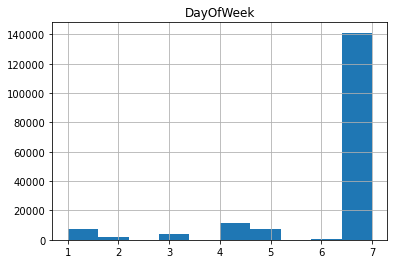

In [9]:
train_store_closed.hist('DayOfWeek')

### It seems that during the weekend, especially sundays.

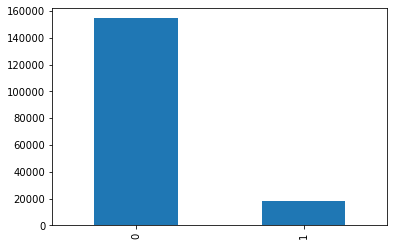

In [10]:
# Checking whether there was a school holiday when the store was closed
train_store_closed['SchoolHoliday'].value_counts().plot(kind='bar');

## Most of the days the store was closed is because a school holiday.

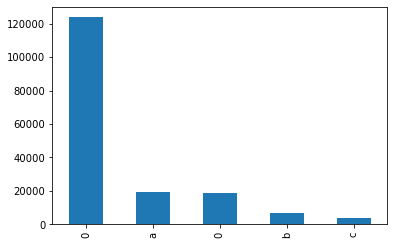

In [11]:

# Checking whether there was a state holiday when the store was closed
train_store_closed['StateHoliday'].value_counts().plot(kind='bar');

In [12]:
# Checking missing values in train set - no missing value
train.isnull().sum()

Store                   0
DayOfWeek               0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
SalePerCustomer    172869
dtype: int64

In [13]:
# No. of days when store was opened but zero sales - might be because of external factors or refurbishmnent
train[(train.Open == 1) & (train.Sales == 0)].shape[0]

54

## Handling missing values in the store dataframe. 

In [14]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## For competition distance it can be use the median. But for the OPEN SINCE columns it would not work so 0 will be imputed. We will do the same with promo. 

In [15]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)

In [16]:
# No info about other columns - so replcae by 0
store.fillna(0, inplace=True)

In [17]:
# Assuming stores open in test
test.fillna(1, inplace=True)

## Merging train and store tables. 

In [18]:

# Joining the tables
train_store_joined = pd.merge(train, store, on='Store', how='inner')
train_store_joined.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## How many sales, sales per customer and number of customers we have by store type _(a,b,c,d)_?

In [19]:
train_store_joined.groupby('StoreType')['Customers', 'Sales', 'SalePerCustomer'].sum().sort_values('Sales', ascending=False)

,Customers,Sales,SalePerCustomer
StoreType,,,
a,363541434,3165334859,4.043129e+06
d,156904995,1765392943,2.918350e+06
c,92129705,783221426,9.744876e+05
b,31465621,159231395,7.987612e+04


## How many stores are closed or their sales are zero?

In [20]:
# Closed and zero-sales obseravtions
train_store_joined[(train_store_joined.Open ==0) | (train_store_joined.Sales==0)].shape

(172871, 22)

## Dataframe which holds open stores and sales greater than 0. 

In [21]:
# Open & Sales >0 stores
train_store_joined_open = train_store_joined[~((train_store_joined.Open ==0) | (train_store_joined.Sales==0))]

In [22]:
train_store_joined_open.groupby('StoreType')['Sales','SalePerCustomer'].sum().sort_values('Sales',ascending = False)

,Sales,SalePerCustomer
StoreType,,
a,3165334859,4.043129e+06
d,1765392943,2.918350e+06
c,783221426,9.744876e+05
b,159231395,7.987612e+04


## Stores a and d have the biggest sales, but stores c and d have the biggest sale by customer. 

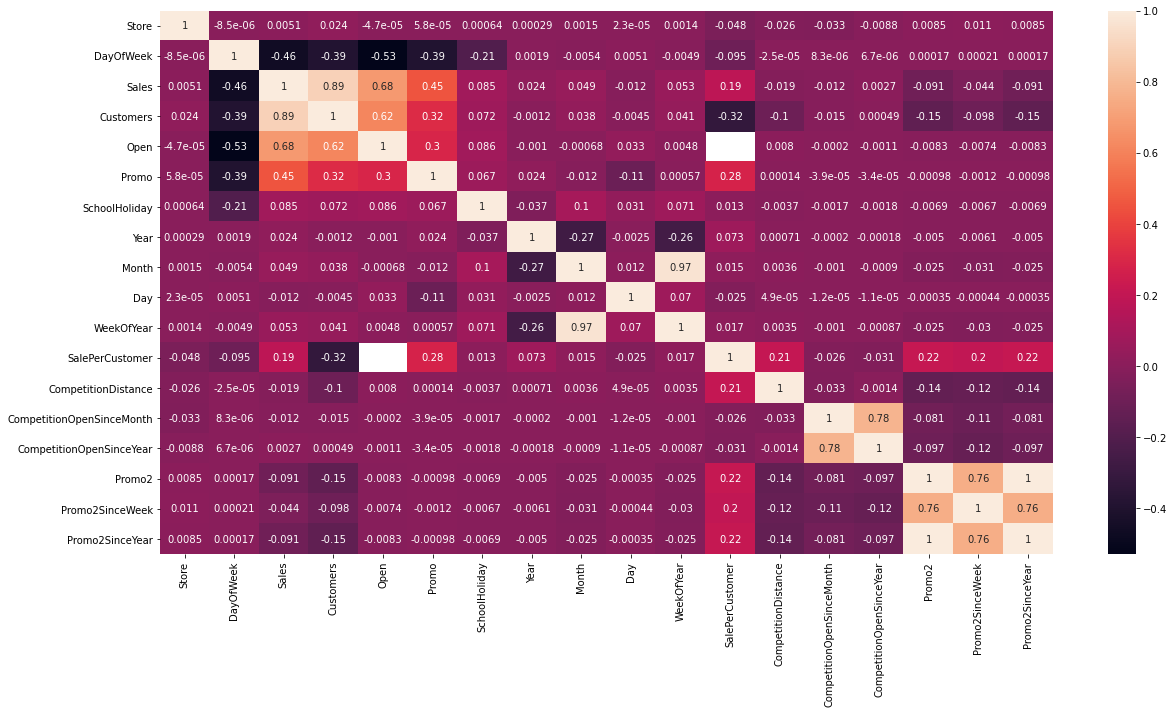

In [23]:
plt.figure(figsize = (20, 10))
sns.heatmap(train_store_joined.corr(), annot = True);

## There is a correlation between promo number 1 and sales. 

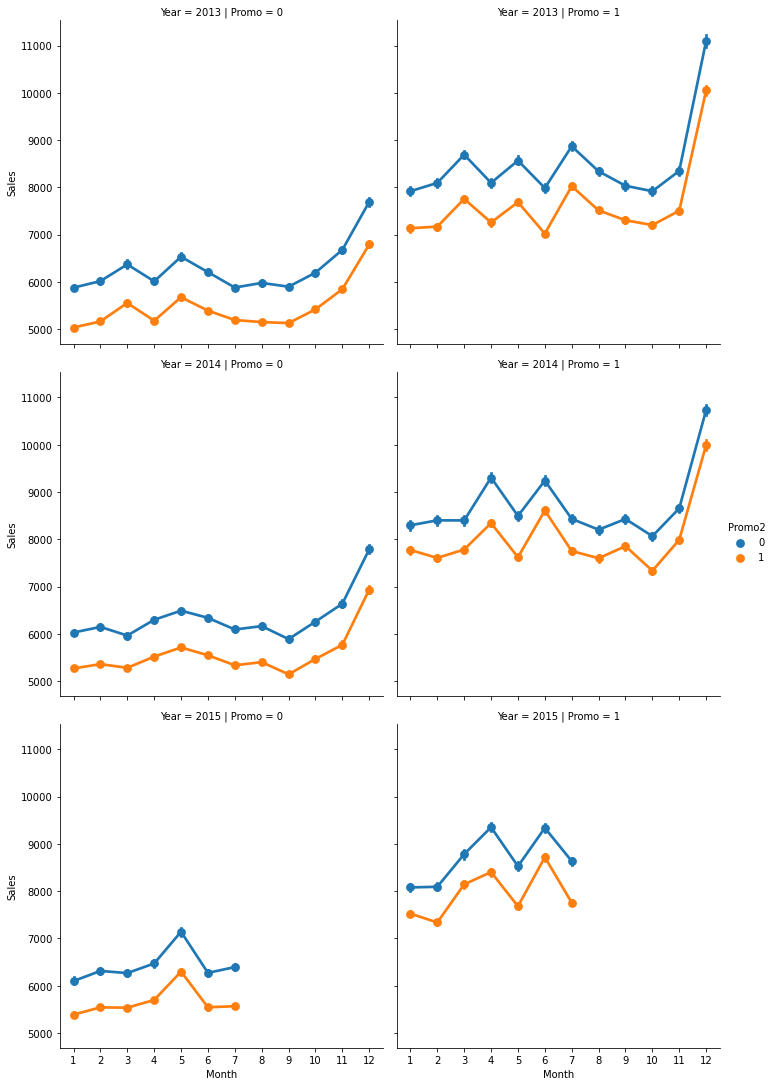

In [24]:
# Sales trend over the months
sns.factorplot(data = train_store_joined_open, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             );

## Each row is a different year. The x axes represents the months and the y axes the sales. It can be seen that sales go up with promo and that they vary within the months so there are somo seasionality in the data. 

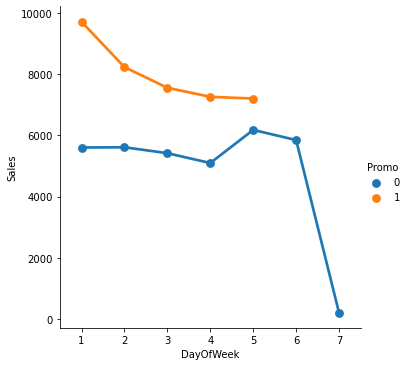

In [25]:
# Sales trend over days
sns.factorplot(data = train_store_joined, x = "DayOfWeek", y = "Sales", hue = "Promo")


### We can see from the trend that there are no promotions on the weekends i.e Saturday and Sunday, which makes sense as stores want to earn a maximum profit during the time when people do their house chores. The sales tend to increase on Sunday because people shop during the weekend. We can also see that the maximum sale happens on Mondays when there are promotional offers.

In [26]:
pd.plotting.register_matplotlib_converters()

## We will take a sample store for each type and analyze how the sales vary in a **weekly basis**.

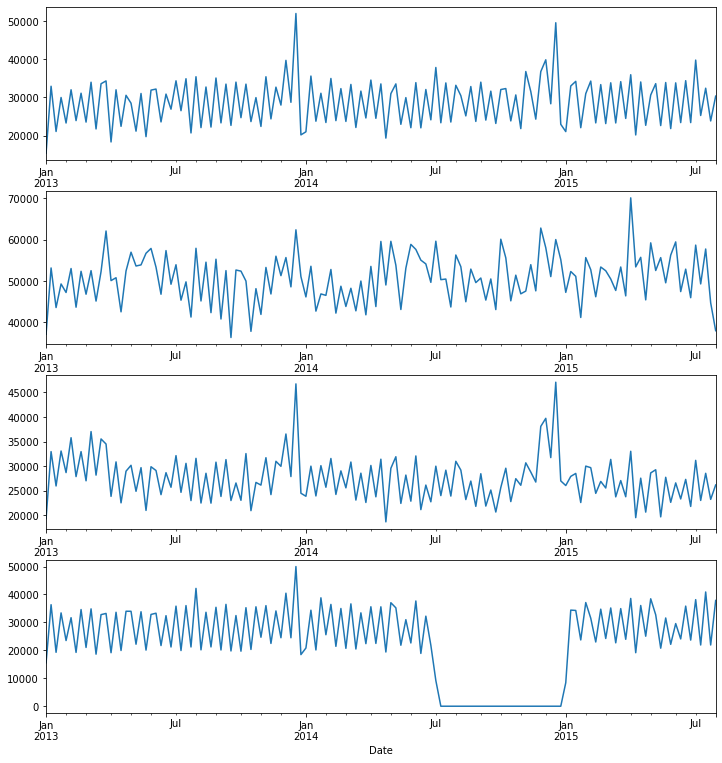

In [27]:
# Data Preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0

# Assigning one store from each category
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) 
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# Trend
sales_a.resample('W').sum().plot(ax = ax1)
sales_b.resample('W').sum().plot(ax = ax2)
sales_c.resample('W').sum().plot(ax = ax3)
sales_d.resample('W').sum().plot(ax = ax4);

## From above plots that sales for StoreType A and C tend to peak in the end of year (Christmas season). For StoreType B there is not a clear trend, maybe the store was closed by that time. 

# **Data modeling**

## In order to forecast the sales we need **stationary** data. This means that the data have constant mean, constant variance and constant covariance with time. 

### There are two methods one visualy and one with hypotesis testing for which we can see if the data is stationary:

1) Rolling mean:  A rolling analysis of a time series model is often used to assess the model's stability over time. The window is rolled (slide across the data) on a weekly basis, in which the average is taken on a weekly basis. Rolling Statistics is a visualization test, where we can compare the original data with the rolled data and check if the data is stationary or not.


2) Dicky -Fuller test: This test provides us the statistical data such as p-value to understand whether we can reject the null hypothesis. The null hypothesis states that data is not stationary and the alternative hypothesis states that data is stationary. If p-value is less than the critical value (say 0.05), we will reject the null hypothesis.



In [28]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()

    # Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Performing Dickey-Fuller test:
    print('Null hypotesis Ho: The data is not stationary')
    print('Alternative hypotesis H1: The data is stationary')
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)
    print('Based on the hypotesis test, using the p-value there is:')       
    if  result[1] <= 0.05:
        print('Strong evidence against the null hypothesis.')
    else:
        print('Weak evidence against the null hypothesis.')               

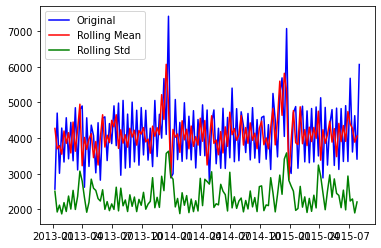

Null hypotesis Ho: The data is not stationary
Alternative hypotesis H1: The data is stationary
Results of Dickey-Fuller Test:
ADF Statistic: -6.218237
p-value: 0.000000
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583
Based on the hypotesis test, using the p-value there is:
Strong evidence against the null hypothesis.


In [29]:
# Testing stationarity of store type a
test_stationarity(sales_a)

## Based on the results, the data is stationary so we dont need to implement any method to transform our data. 

## It's time to see the seasonality and the trends of the data during the months.

In [30]:
# Plotting seasonality and trend
def plot_timeseries(sales,StoreType):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition= seasonal_decompose(sales, model = 'additive',freq=365)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');
    axes[0].set_xlabel('months')
    axes[0].set_ylabel('sales')
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    axes[1].set_xlabel('months')
    axes[1].set_ylabel('sales')

    plt.title('Decomposition Plots')

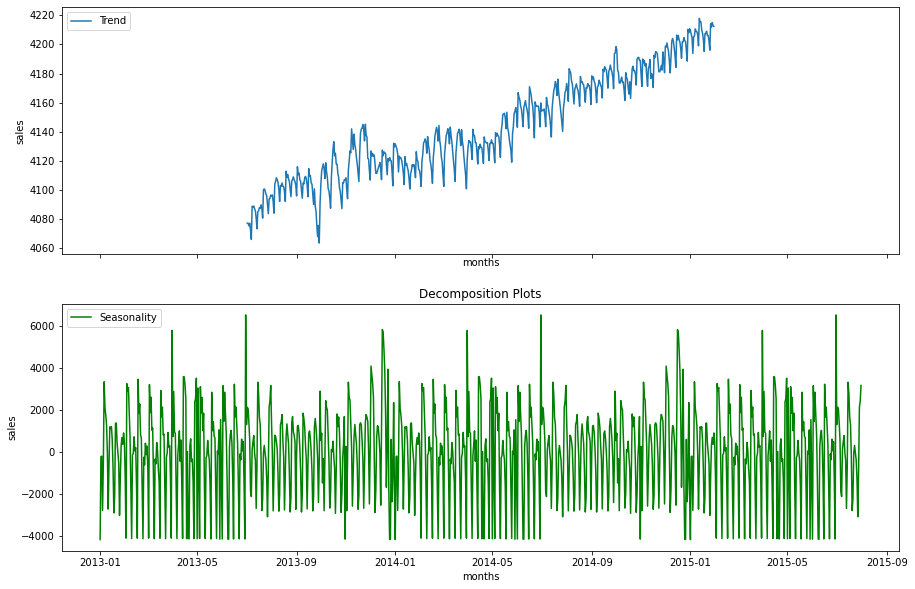

In [31]:
# Plotting seasonality and trend for store type a
plot_timeseries(sales_a,'a')

## The data is seasonal and there is a trend we can observe so we can use SARIMAX model and prophet model in order to forecast our data. 

# **Evaluation Metrics**

## **Mean Absolute Error (MAE)**: It is the average of the absolute difference between the predicted values and observed values.

## **Root Mean Square Error (RMSE)**: It is the square root of the average of squared differences between the predicted values and observed values.

### MAE is easier to understand and interpret but RMSE works well in situations where large errors are undesirable. This is because the errors are squared before they are averaged, thus penalizing large errors. In our case, RMSE suits well because we want to predict the sales with minimum error (i.e penalize high errors) so that inventory can be managed properly. So, we’ll choose RMSE as a metric to measure the performance of our models.

## In order to use this model, we need to first find out values of p, d and q. 

### **P** represents number of Autoregressive terms - lags of dependent variable. 

### **Q** represents number of Moving Average terms - lagged forecast errors in prediction equation. 

### **D** represents number of non-seasonal differences.

### To find the values of p, d and q - we use Autocorrelation function (ACF) and Partial Autocorrelation (PACF) plots.

### **ACF**  measure of correlation between time series with a lagged version of itself. 

### **PACF** measure of correlation between time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparison.

### **P** value is the value on x-axis of **PACF** where the plot crosses the **upper** Confidence Interval for the first time.

### **Q** value is the value on x-axis of **ACF** where the plot crosses the **upper** Confidence Interval for the first time.

## Here are two graphs that represents the autocorrelation and partial autocorrelation. 

In [32]:
def auto_corr_tsa(sales):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(sales,lags=30,ax = ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(sales,lags=30,method = 'ols',ax = ax2)    
    

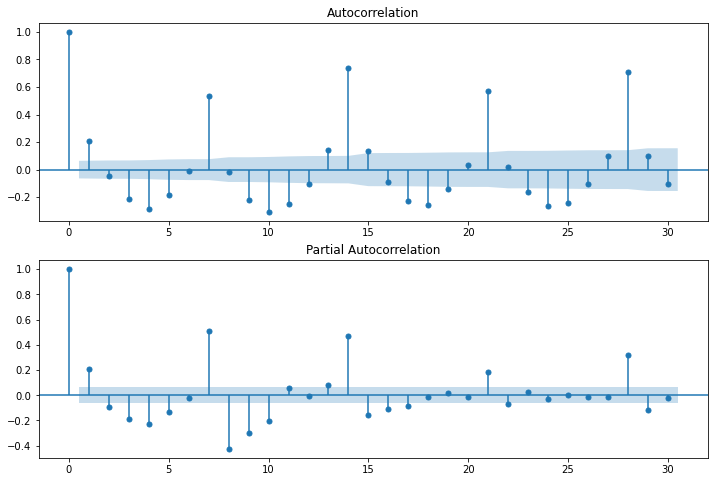

In [33]:
auto_corr_tsa(sales_a)

In [34]:
# Autocorrelation function to make ACF and PACF graphs
def auto_corr(sales):
    lag_acf = acf(sales,nlags=30)
    lag_pacf = pacf(sales,nlags=30,method='ols')
  
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('ACF')
    
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('PACF')

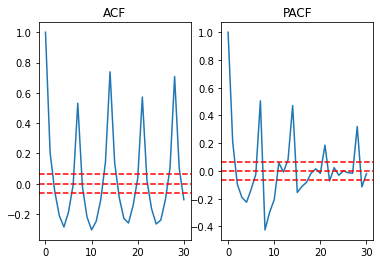

In [35]:
# ACF and PACF for store type a
auto_corr(sales_a)


## The above graphs suggest that the p = 2 and q = 2 but let's do a grid search and see which combination of p, q and d gives the lowest **Akaike Information Criterion** (AIC). The AIC  is an estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, **AIC estimates the quality of each model, relative to each of the other models**. Thus, AIC provides a means for model selection. Best model uses the lowest number of features to fit the data.

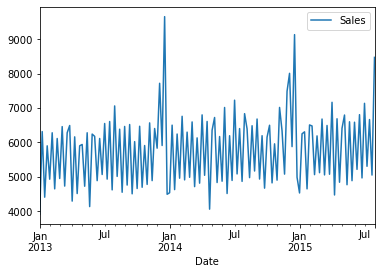

In [36]:
# Summing sales on per week basis
train_arima = train.resample("W").mean() 
train_arima = train_arima[["Sales"]]
train_arima.plot();

## This is how the sales change during the months taking in count the whole dataset. 

## We are going to implement a grid search to obtain the best p,q and d values. This values corresponds to the ones that derives in a lower AIC. 

In [37]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2708.8196371542945
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2357.203980769032
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2142.9121481207667
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1893.822052279753
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2163.085669279766
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2116.70579126735
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1919.9439695857754
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1894.9524107309524
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2592.3366943411565
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2305.886830503392
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2103.0171891135683
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1856.635325966678
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2146.0426171359118
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2066.908592978102
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1902.4415089751813
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1852.884184254118
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2368.481953362583
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2154.580453193124
ARI

## From the above grid search that our optimal parameter combination is ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1806.2981906705384.

In [39]:
# Fitting the data to SARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(train_arima,
                                order=(1, 1, 1),# p,d,q
                                seasonal_order=(0, 1, 1, 12),# p,d,q, we are shifting by 12 during a season. 
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_sarima = model_sarima.fit()

print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5251      0.103     -5.091      0.000      -0.727      -0.323
ma.L1         -0.9559      0.050    -19.076      0.000      -1.054      -0.858
ma.S.L12      -1.0120      0.831     -1.218      0.223      -2.640       0.616
sigma2      8.268e+05   7.31e+05      1.131      0.258   -6.06e+05    2.26e+06


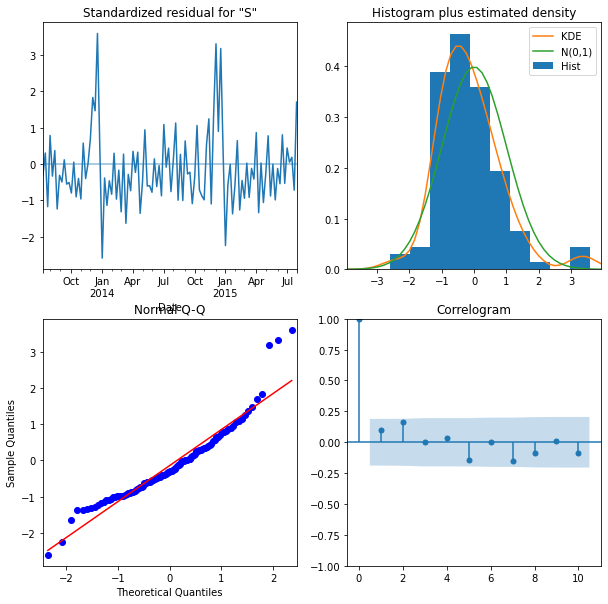

In [40]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.show()


## We can see from the above 'Histogram plus estimated density' plot that our KDE (Kernel Desnity Estimator) plot closely follows the N(0,1) normal distribution plot. The Normal Q-Q plot shows that the ordered distribution of residuals follows the distribution similar to normal distribution. Thus, our model seems to be pretty good.

## Standardized residual plot tells us that there is no major seasonality trend, which is confirmed by Correlogram (autocorrelation) plot. Autocorrelation plot tells us that the time series residuals have low correlation with lagged versions of itself.

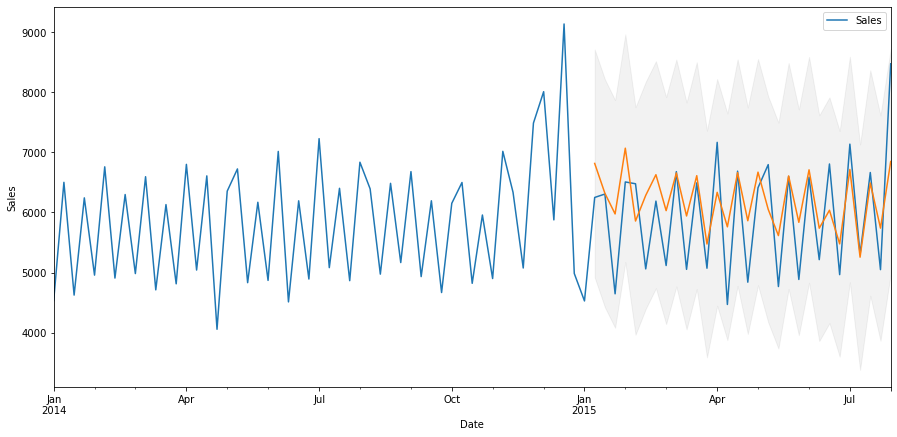

Root Mean Squared Error:  739.0611642066918


In [41]:
# Model Prediction and validation 
# Predictions are performed for the 11th Jan' 2015 onwards of the train data.

pred = results_sarima.get_prediction(start=pd.to_datetime('2015-01-11'), dynamic = False) 

# Get confidence intervals of forecasts
pred_ci = pred.conf_int() 

ax = train_arima["2014":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend
plt.show()

train_arima_forecasted = pred.predicted_mean
train_arima_truth = train_arima["2015-01-11":]

# Calculating the error
rms_arima = sqrt(mean_squared_error(train_arima_truth, train_arima_forecasted))
print("Root Mean Squared Error: ", rms_arima)

# **Model 2 : Prophet by facebook**

## **How prophet works**

### At its core, the Prophet procedure is an additive regression model with four main components:

* A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
* A yearly seasonal component modeled using Fourier series.
* A weekly seasonal component using dummy variables.
* A user-provided list of important holidays.

### Important note about prophet. 

### The important idea in Prophet is that **by doing a better job of fitting the trend component** very flexibly, it models more accurately model seasonality and the result is a more accurate forecast. It prefers to use a very flexible regression model (somewhat like curve-fitting) instead of a traditional time series model for this task because it gives it more modeling flexibility, makes it easier to fit the model, and handles missing data or outliers more gracefully.

### By default, Prophet will provide uncertainty intervals for the trend component by simulating future trend changes to your time series. If you wish to model uncertainty about future seasonality or holiday effects, you can run a few hundred HMC iterations (which takes a few minutes) and your forecasts will include seasonal uncertainty estimates.

In [42]:
train_prophet = train.copy()
train_prophet.reset_index(level=0, inplace=True)

In [43]:
train_prophet.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
0,2015-07-31,1,5,5263.0,555,1,1,0,1,2015,7,31,31,9.482883
1,2015-07-31,2,5,6064.0,625,1,1,0,1,2015,7,31,31,9.702400
2,2015-07-31,3,5,8314.0,821,1,1,0,1,2015,7,31,31,10.126675
3,2015-07-31,4,5,13995.0,1498,1,1,0,1,2015,7,31,31,9.342457
4,2015-07-31,5,5,4822.0,559,1,1,0,1,2015,7,31,31,8.626118


## The prophet model needs that the **date** column is named **ds** and the **sales** , or whatever we are forecasting, is named **y**. 

In [44]:
train_prophet = train_prophet.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
train_prophet.head()

,ds,Store,DayOfWeek,y,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
0,2015-07-31,1,5,5263.0,555,1,1,0,1,2015,7,31,31,9.482883
1,2015-07-31,2,5,6064.0,625,1,1,0,1,2015,7,31,31,9.702400
2,2015-07-31,3,5,8314.0,821,1,1,0,1,2015,7,31,31,10.126675
3,2015-07-31,4,5,13995.0,1498,1,1,0,1,2015,7,31,31,9.342457
4,2015-07-31,5,5,4822.0,559,1,1,0,1,2015,7,31,31,8.626118



# **Hypertuning Prophet model**

## There are a lot of parameters available in the Prophet model. One of the most important ones is 'holidays'. This lets us pass holidays explicitly while training the model. We'll create a new 'holidays' data frame by taking observations when there was school or state holiday.

## We'll also use three more parameters viz.

### **Interval_width**: It defines the uncertainty level to make the prediction. The default value is 0.8 but we'll take 0.95 because we want to be certain in our predictions.

### **Growth**: We know that 'Sales' can take any value and there is no saturation point. So, we'll take 'linear' growth instead of 'logarithmic'.

### **Yearly_seasonality**: We'll explicitly pass it as 'True' because we know that there is a yearly seasonality (discussed above) present in our data.

In [45]:
# Encoding state holiday categorical variable
train_prophet["StateHoliday_cat"] = train_prophet["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})
train_prophet.head()

,ds,Store,DayOfWeek,y,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StateHoliday_cat
0,2015-07-31,1,5,5263.0,555,1,1,0,1,2015,7,31,31,9.482883,0
1,2015-07-31,2,5,6064.0,625,1,1,0,1,2015,7,31,31,9.702400,0
2,2015-07-31,3,5,8314.0,821,1,1,0,1,2015,7,31,31,10.126675,0
3,2015-07-31,4,5,13995.0,1498,1,1,0,1,2015,7,31,31,9.342457,0
4,2015-07-31,5,5,4822.0,559,1,1,0,1,2015,7,31,31,8.626118,0


In [46]:
# Choosing only required cols
train_prophet = train_prophet[['ds', 'y', 'SchoolHoliday', 'StateHoliday_cat']]
train_prophet.head()

,ds,y,SchoolHoliday,StateHoliday_cat
0,2015-07-31,5263.0,1,0
1,2015-07-31,6064.0,1,0
2,2015-07-31,8314.0,1,0
3,2015-07-31,13995.0,1,0
4,2015-07-31,4822.0,1,0


## Modeling the holidays data 

### First we are going to obtain which dates were state holidays and school holidays respectively.

### Second we will create two dataframes with that information labeling each data correspondingly.

### Third we will concatenate the two dataframes into the _holidays_ dataframe. 

In [47]:
# Modelling holidays - creating holidays dataframe
state_dates = train_prophet[(train_prophet.StateHoliday_cat == 1)].loc[:, "ds"].values
school_dates = train_prophet[(train_prophet.SchoolHoliday == 1)].loc[:, "ds"].values

state = pd.DataFrame({"holiday": "state_holiday",  "ds": pd.to_datetime(state_dates)})
school = pd.DataFrame({"holiday": "school_holiday", "ds": pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [48]:
# Dropping holiday columns because not needed any more
train_prophet_clean = train_prophet.drop(["SchoolHoliday", "StateHoliday_cat"], axis = 1)
train_prophet_clean.head()

,ds,y
0,2015-07-31,5263.0
1,2015-07-31,6064.0
2,2015-07-31,8314.0
3,2015-07-31,13995.0
4,2015-07-31,4822.0


# We are downsamplig to weekbasis. 

In [49]:
# Downsampling to week because modelling on daily basis takes a lot of time
ts_week_prophet = train_prophet_clean.set_index("ds").resample("W").sum()
ts_week_prophet.head()

,y
ds,
2013-01-06,26129335.0
2013-01-13,49275222.0
2013-01-20,34377765.0
2013-01-27,46040169.0
2013-02-03,38466029.0


In [50]:
# Resetting the index
ts_week_prophet_train = ts_week_prophet.reset_index()
ts_week_prophet_train.head()

,ds,y
0,2013-01-06,26129335.0
1,2013-01-13,49275222.0
2,2013-01-20,34377765.0
3,2013-01-27,46040169.0
4,2013-02-03,38466029.0


In [51]:
# Fitting data to Prophet model
prophet_2 = Prophet(holidays = holidays, interval_width = 0.95, growth='linear') 
prophet_2.fit(ts_week_prophet_train)
print("done")

future_2 = prophet_2.make_future_dataframe(periods = 52, freq = "W") 
forecast_2 = prophet_2.predict(future_2)

forecast_2[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail() # We have a new dataframe, which includes, the forecast and the uncertainity invervals.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


,ds,yhat,yhat_lower,yhat_upper
182,2016-07-03,4.414482e+07,2.976053e+07,5.948681e+07
183,2016-07-10,4.383939e+07,3.007284e+07,5.740639e+07
184,2016-07-17,4.410843e+07,2.961937e+07,5.848106e+07
185,2016-07-24,4.412159e+07,3.152357e+07,5.774792e+07
186,2016-07-31,4.352321e+07,3.007564e+07,5.785294e+07


In [52]:
forecast_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,state_holiday,state_holiday_lower,state_holiday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-06,4.360559e+07,1.403048e+07,4.223373e+07,4.360559e+07,4.360559e+07,-1.597119e+07,-1.597119e+07,-1.597119e+07,-1.309857e+07,...,-1.229775e+07,-1.229775e+07,-1.229775e+07,-2.872625e+06,-2.872625e+06,-2.872625e+06,0.0,0.0,0.0,2.763440e+07
1,2013-01-13,4.360648e+07,2.736405e+07,5.451520e+07,4.360648e+07,4.360648e+07,-2.365428e+06,-2.365428e+06,-2.365428e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.365428e+06,-2.365428e+06,-2.365428e+06,0.0,0.0,0.0,4.124105e+07
2,2013-01-20,4.360737e+07,2.990107e+07,5.811667e+07,4.360737e+07,4.360737e+07,-1.952600e+05,-1.952600e+05,-1.952600e+05,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.952600e+05,-1.952600e+05,-1.952600e+05,0.0,0.0,0.0,4.341211e+07
3,2013-01-27,4.360827e+07,3.017419e+07,5.910544e+07,4.360827e+07,4.360827e+07,1.240495e+06,1.240495e+06,1.240495e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.240495e+06,1.240495e+06,1.240495e+06,0.0,0.0,0.0,4.484876e+07
4,2013-02-03,4.360916e+07,3.188020e+07,5.924419e+07,4.360916e+07,4.360916e+07,1.176155e+06,1.176155e+06,1.176155e+06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.176155e+06,1.176155e+06,1.176155e+06,0.0,0.0,0.0,4.478531e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2016-07-03,4.384311e+07,2.976053e+07,5.948681e+07,4.383550e+07,4.385053e+07,3.017094e+05,3.017094e+05,3.017094e+05,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.017094e+05,3.017094e+05,3.017094e+05,0.0,0.0,0.0,4.414482e+07
183,2016-07-10,4.384478e+07,3.007284e+07,5.740639e+07,4.383699e+07,4.385245e+07,-5.394328e+03,-5.394328e+03,-5.394328e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-5.394328e+03,-5.394328e+03,-5.394328e+03,0.0,0.0,0.0,4.383939e+07
184,2016-07-17,4.384646e+07,2.961937e+07,5.848106e+07,4.383842e+07,4.385437e+07,2.619757e+05,2.619757e+05,2.619757e+05,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.619757e+05,2.619757e+05,2.619757e+05,0.0,0.0,0.0,4.410843e+07
185,2016-07-24,4.384813e+07,3.152357e+07,5.774792e+07,4.383984e+07,4.385624e+07,2.734521e+05,2.734521e+05,2.734521e+05,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.734521e+05,2.734521e+05,2.734521e+05,0.0,0.0,0.0,4.412159e+07


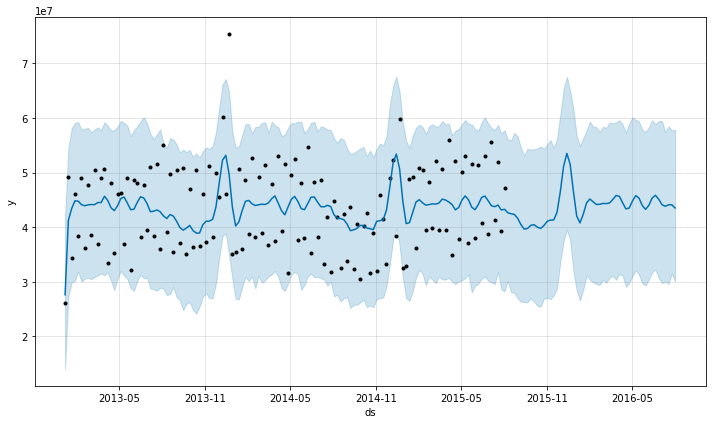

In [53]:
# Visualizing predicions of forecast
prophet_2.plot(forecast_2);

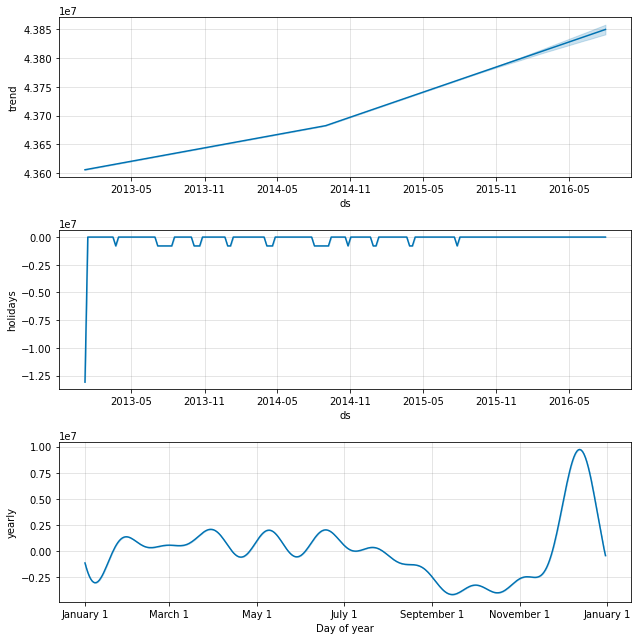

In [54]:
# Visualizing trend and seasonality components
prophet_2.plot_components(forecast_2);

## The trend of the sales goes up as shown in the first graph. The second graph shows the holidays gap and  finally during December the sales go up. 

In [55]:
# Checking the RMSE of Prophet model
metric_prophet_2 = forecast_2.set_index('ds')[['yhat']].join(ts_week_prophet_train.set_index('ds').y).reset_index()
metric_prophet_2.dropna(inplace=True)
rms_prophet_2 = mean_squared_error(metric_prophet_2.y, metric_prophet_2.yhat)
rms_prophet_2

52478290246951.0

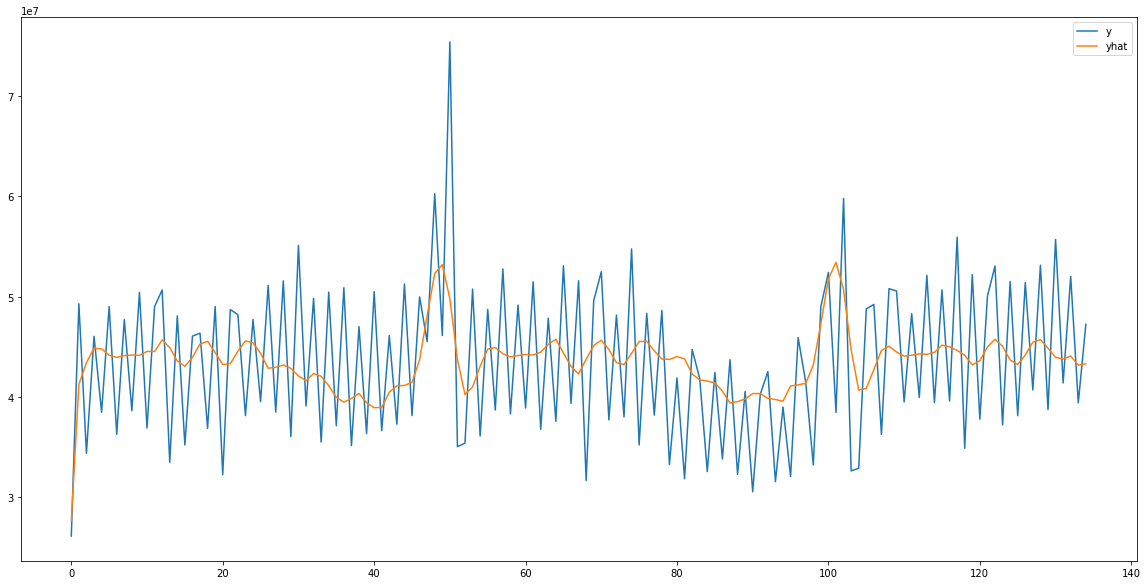

In [56]:
# Visualizing the performance of model
plt.figsize=(10,20)
metric_prophet_2["y"].plot(figsize=(20,10))
metric_prophet_2["yhat"].plot()
plt.legend()
plt.show()

# **Model 3 XGBoost** 

## Data preprocesing. 

In [57]:
# Dropping Customers and Sale per customer
ts_xgboost = train_store_joined.copy()
ts_xgboost = ts_xgboost.drop(['Customers', 'SalePerCustomer', 'PromoInterval'], axis=1) # axis 1 refer to columns. 

In [58]:
# Combining similar columns into one column and dropping old columns
ts_xgboost['CompetitionOpen'] = 12 * (ts_xgboost.Year - ts_xgboost.CompetitionOpenSinceYear) + (ts_xgboost.Month - ts_xgboost.CompetitionOpenSinceMonth)
ts_xgboost['PromoOpen'] = 12 * (ts_xgboost.Year - ts_xgboost.Promo2SinceYear) + (ts_xgboost.WeekOfYear - ts_xgboost.Promo2SinceWeek) / 4.0
ts_xgboost = ts_xgboost.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)
ts_xgboost = ts_xgboost.drop(["Promo2SinceWeek", "Promo2SinceYear"], axis = 1)

In [59]:
ts_xgboost.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpen,PromoOpen
0,1,5,5263,1,1,0,1,2015,7,31,31,c,a,1270.0,0,82.0,24187.75
1,1,4,5020,1,1,0,1,2015,7,30,31,c,a,1270.0,0,82.0,24187.75
2,1,3,4782,1,1,0,1,2015,7,29,31,c,a,1270.0,0,82.0,24187.75
3,1,2,5011,1,1,0,1,2015,7,28,31,c,a,1270.0,0,82.0,24187.75
4,1,1,6102,1,1,0,1,2015,7,27,31,c,a,1270.0,0,82.0,24187.75


In [60]:
# Converting categorical cols to numerical cols and removing old cols
mappings = {0:0, "0": 0, "a": 1, "b": 1, "c": 1}
ts_xgboost["StateHoliday_cat"] = ts_xgboost["StateHoliday"].map(mappings)
ts_xgboost["StoreType_cat"] = ts_xgboost["StoreType"].map(mappings)
ts_xgboost["Assortment_cat"] = ts_xgboost["Assortment"].map(mappings)
ts_xgboost = ts_xgboost.drop(["StateHoliday", "StoreType", "Assortment"], axis = 1)

In [61]:
ts_xgboost.head()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,CompetitionOpen,PromoOpen,StateHoliday_cat,StoreType_cat,Assortment_cat
0,1,5,5263,1,1,1,2015,7,31,31,1270.0,0,82.0,24187.75,0,1.0,1
1,1,4,5020,1,1,1,2015,7,30,31,1270.0,0,82.0,24187.75,0,1.0,1
2,1,3,4782,1,1,1,2015,7,29,31,1270.0,0,82.0,24187.75,0,1.0,1
3,1,2,5011,1,1,1,2015,7,28,31,1270.0,0,82.0,24187.75,0,1.0,1
4,1,1,6102,1,1,1,2015,7,27,31,1270.0,0,82.0,24187.75,0,1.0,1


## Spliting the data into train and test. 

In [62]:
# Splitting the data
features = ts_xgboost.drop(["Sales"], axis = 1)
target = ts_xgboost["Sales"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.20)

In [63]:
# Tuning parameters - using default metrics
params = {'max_depth':6, "booster": "gbtree", 'eta':0.3, 'objective':'reg:linear'} 

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Training the model
xgboost = xgb.train(params, dtrain, 100, evals=watchlist,early_stopping_rounds= 100, verbose_eval=True)
         
# Making predictions
preds = xgboost.predict(dtest)

[12:04:27] WARNING: d:\bld\xgboost-split_1631904903843\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5164.99707	eval-rmse:5159.06201
[1]	train-rmse:4013.36060	eval-rmse:4007.22119
[2]	train-rmse:3294.15356	eval-rmse:3288.74048
[3]	train-rmse:2874.70093	eval-rmse:2870.37036
[4]	train-rmse:2633.98633	eval-rmse:2630.24414
[5]	train-rmse:2505.57227	eval-rmse:2502.97095
[6]	train-rmse:2406.91382	eval-rmse:2403.98438
[7]	train-rmse:2366.73389	eval-rmse:2364.67847
[8]	train-rmse:2317.48413	eval-rmse:2316.08765
[9]	train-rmse:2257.51172	eval-rmse:2253.87061
[10]	train-rmse:2220.77148	eval-rmse:2216.45923
[11]	train-rmse:2206.56396	eval-rmse:2202.69605
[12]	train-rmse:2183.31787	eval-rmse:2180.20264
[13]	train-rmse:2173.03027	eval-rmse:2169.93506
[14]	train-rmse:2157.91675	eval-rmse:2154.57959
[15]	train-rmse:2152.10474	eval-rmse:2149.32007
[16]	train-rmse:2115.81226	eval-rmse:2115.83667
[17]	train-rmse:2110.94897	eval-rmse:2

In [64]:
# RMSE of model
rms_xgboost = sqrt(mean_squared_error(y_test, preds))
print("Root Mean Squared Error for XGBoost:", rms_xgboost)

Root Mean Squared Error for XGBoost: 1234.6493509234708


## Hyperparameter tuning for XGBoost. 

## Now let's try to decrease the RMSE of XGBoost by passing different values for our hyperparameters in the XGBoost model.

### *eta: It defines the learning rate i.e step size to learn the data in the gradient descent modeling (the basis for XGBoost). The default value is 0.3 but we want to keep the learning rate low to avoid overfitting. So, we'll choose 0.1 as eta.

### *max_depth: Maximum depth of a tree. The default value is 6 but we want our model to be more complex and find good predictions. So, let's choose 10 as max depth.

### * gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be. The default value is 0, let's choose a little higher value so as to get good predictions

In [65]:
# Tuning parameters
params_2 = {'max_depth':10, 'eta':0.1,  'gamma': 2}

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Training the model
xgboost_2 = xgb.train(params_2, dtrain, 100, evals=watchlist,early_stopping_rounds= 100, verbose_eval=True)
         
# Making predictions
preds_2 = xgboost_2.predict(dtest)

[0]	train-rmse:6324.37695	eval-rmse:6319.99756
[1]	train-rmse:5777.96094	eval-rmse:5773.09668
[2]	train-rmse:5293.05664	eval-rmse:5288.21728
[3]	train-rmse:4861.19580	eval-rmse:4856.90186
[4]	train-rmse:4481.09668	eval-rmse:4477.11133
[5]	train-rmse:4147.04443	eval-rmse:4142.91992
[6]	train-rmse:3854.36401	eval-rmse:3851.01685
[7]	train-rmse:3593.64209	eval-rmse:3590.97314
[8]	train-rmse:3370.52222	eval-rmse:3368.52368
[9]	train-rmse:3175.29712	eval-rmse:3174.04590
[10]	train-rmse:3003.39062	eval-rmse:3003.12939
[11]	train-rmse:2861.54150	eval-rmse:2862.34277
[12]	train-rmse:2736.07812	eval-rmse:2737.32056
[13]	train-rmse:2622.95923	eval-rmse:2625.01562
[14]	train-rmse:2526.93408	eval-rmse:2530.36231
[15]	train-rmse:2450.62231	eval-rmse:2454.91162
[16]	train-rmse:2374.71167	eval-rmse:2380.04419
[17]	train-rmse:2317.96118	eval-rmse:2324.53198
[18]	train-rmse:2263.22266	eval-rmse:2271.29517
[19]	train-rmse:2214.32519	eval-rmse:2223.64941
[20]	train-rmse:2176.70630	eval-rmse:2186.56348
[2

In [66]:
# RMSE of model
rms_xgboost_2 = sqrt(mean_squared_error(y_test, preds_2))
print("Root Mean Squared Error for XGBoost:", rms_xgboost_2)

Root Mean Squared Error for XGBoost: 1180.5159429228581


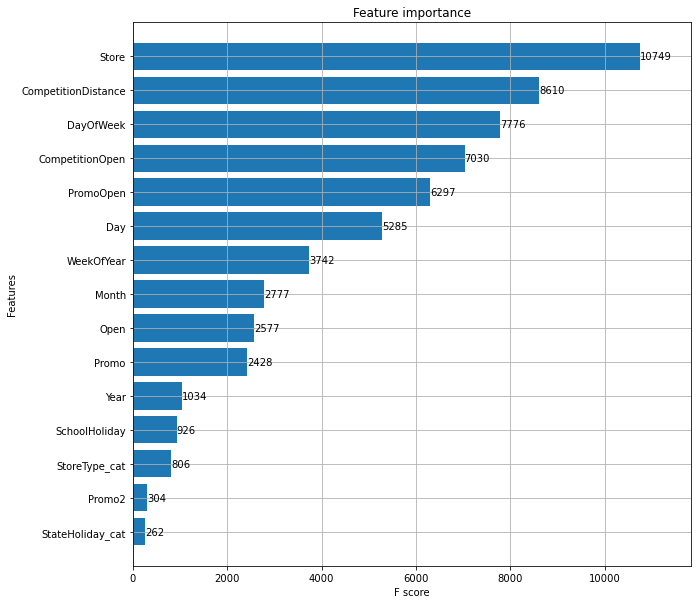

In [67]:

# Let's see the feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgboost_2, max_num_features=50, height=0.8, ax=ax)
plt.show()

# **Model 4 LSTM**

## Models will be developed using the training dataset and will make predictions on the test dataset.

## A rolling forecast scenario will be used, also called walk-forward model validation.

## Each time step of the test dataset will be walked one at a time. A model will be used to make a forecast for the time step, then the actual expected value from the test set will be taken and made available to the model for the forecast on the next time step.

## **LSTM Data prepatarion** 

1.Transform the time series into a supervised learning problem.

2.Transform the time series data so that it is stationary.

3.Transform the observations to have a specific scale.

## **Transform Time Series to Supervised Learning**

### The LSTM model in Keras assumes that your data is divided into input (X) and output (y) components.

### For a time series problem, we can achieve this by using the observation from the last time step (t-1) as the input and the observation at the current time step (t) as the output

In [68]:
train_lstm = train_prophet[['ds','y']]

In [69]:
train_lstm.head()

,ds,y
0,2015-07-31,5263.0
1,2015-07-31,6064.0
2,2015-07-31,8314.0
3,2015-07-31,13995.0
4,2015-07-31,4822.0


In [70]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = pd.concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [71]:
X = train_lstm['y']

In [72]:
supervised = timeseries_to_supervised(X,1)
print(supervised.head())

         y        y
0      0.0   5263.0
1   5263.0   6064.0
2   6064.0   8314.0
3   8314.0  13995.0
4  13995.0   4822.0


# **Transform Time Series to Scale**

## Like other neural networks, LSTMs expect data to be within the scale of the activation function used by the network.

## The default activation function for LSTMs is the hyperbolic tangent (tanh), which outputs values between -1 and 1. This is the preferred range for the time series data.

## To make the experiment fair, the scaling coefficients (min and max) values must be calculated on the training dataset and applied to scale the test dataset and any forecasts. This is to avoid contaminating the experiment with knowledge from the test dataset, which might give the model a small edge.

## We can transform the dataset to the range [-1, 1] using the `MinMaxScaler` class. Like other scikit-learn transform classes, it requires data provided in a matrix format with rows and columns. Therefore, we must reshape our NumPy arrays before transforming

# **Fitting the LSTM model to the data**

In [73]:
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]


# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# **Training the LSTM model and macking predictions.**

In [75]:
raw_values = train_lstm['y']
supervised = timeseries_to_supervised(raw_values, 1)
supervised_values = supervised.values
train, test = supervised_values[0:-12], supervised_values[-12:]
scaler, train_scaled, test_scaled = scale(train, test)
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

KeyboardInterrupt: 

In [ ]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

In [ ]:
rmse_lstm = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse_lstm)

## Model comparison. 

In [74]:

# Comparing performance of above three models - through RMSE
rms_arima = format(float(rms_arima))
rms_prophet_2 = format(float(rms_prophet_2))
rms_xgboost_2 = format(float(rms_xgboost_2))
rms_lstm = format(float(rmse_lstm))

model_errors = pd.DataFrame({
    "Model": ["SARIMA", "Prophet", "XGBoost","LSTM"],
    "RMSE": [rms_arima, rms_prophet_2, rms_xgboost_2,rms_lstm]
})

model_errors.sort_values(by = "RMSE")

,Model,RMSE
2,XGBoost,1180.5159429228581
1,Prophet,52478290246951.0
0,SARIMA,739.0611642066918



# **Model Comparison & Selection**

## We used the Root Mean Squared Error (RMSE) to evaluate and validate the performance of various models used. Let's see which model performed better and why/why not.

## a) We can see from the above table that SARIMA performs the best followed by XGBoost and Prophet.

## b) It makes sense because SARIMA is designed specifically for seasonal time series data while XGBoost is a general (though powerful) machine learning approach with various applications.

## c) Prophet is a good choice for producing quick forecasts as it doesn't require strong technical skills. It is easy to implement at scale. The reason for its poor performance here is probably because of a lack of data. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

## Based on the above analysis, we'll choose ARIMA as our final model to predict the sales because it gives us the least RMSE and is well suited to our needs of predicting time series seasonal data. We chose ARIMA(1, 1, 1)x(0, 1, 1, 12)12 as the final parameter combination with AIC of 1806.29 and RMSE of 739.06.

# **Conclusions**

## Our task was to predict the sales of each store for next month. We started by exploring the time series data and then did some feature engineering to prepare the data for modelling. Finally, we used various modelling techniques such as SARIMA, Prophet and XGBoost to predict the sales. SARIMA, a model designed specifically for time series performed the best. We also plotted the truth vs predicted sales to understand the performance of model in addition to calcualting squared mean error.

# **Reflection**

## The most interesting thing about the project was that the category of stores having the highest sales don't have the highest sale per customer. It might be because those stores sell small items, which are needed on a daily basis.

## Another interesting thing was that running a promotion for the second time doesn't help in increasing sales. It is probably because customers already purchased whatever they wanted during the first promotional sale.

# **Improvement Areas**:

## We could have used the tranformation techniques to smoothen the data e.g using Moving Average, Log transformation etc. to remove seasonality and trend and make the time series more stationary. After building the model, we would have introduced the behavior of seasonality and trend back to the results. This might have resulted in a better model with a lower RMSE.

## We could also use SARIMAX model that take exogenous variables. These are the variables whose value is determined outside the model and is imposed on the model. In other words, variables that affect a model without being affected by it. For example, Competition Open, Promo Open, etc.